<a href="https://colab.research.google.com/github/champak18/predict_vehicle_price/blob/main/Predict_vehicle_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

                              name  \
0     2024 Jeep Wagoneer Series II   
1  2024 Jeep Grand Cherokee Laredo   
2         2024 GMC Yukon XL Denali   
3       2023 Dodge Durango Pursuit   
4            2024 RAM 3500 Laramie   

                                         description   make           model  \
0  \n      \n        Heated Leather Seats, Nav Sy...   Jeep        Wagoneer   
1  Al West is committed to offering every custome...   Jeep  Grand Cherokee   
2                                                NaN    GMC        Yukon XL   
3  White Knuckle Clearcoat 2023 Dodge Durango Pur...  Dodge         Durango   
4  \n      \n        2024 Ram 3500 Laramie Billet...    RAM            3500   

   year    price                                             engine  \
0  2024  74600.0                            24V GDI DOHC Twin Turbo   
1  2024  50170.0                                                OHV   
2  2024  96410.0  6.2L V-8 gasoline direct injection, variable v...   
3  2023  468

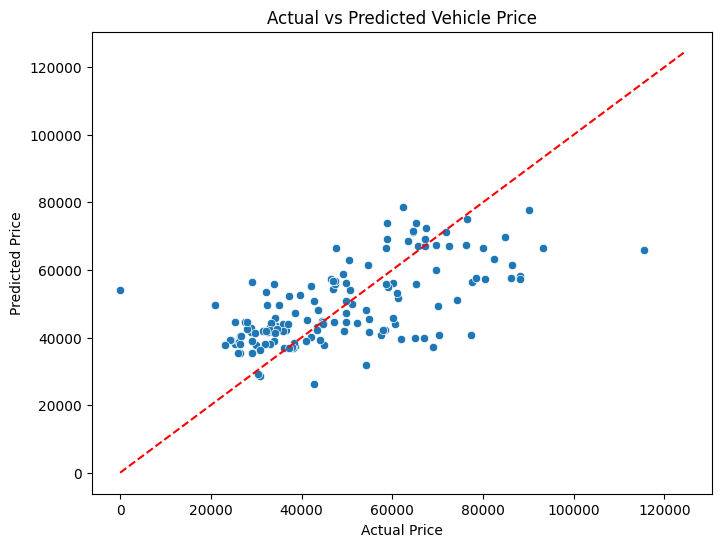

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.metrics import mean_absolute_error # Import mean_absolute_error

# Assuming the file is an Excel file based on the .xls extension
df = pd.read_excel('/content/vehicle_price_prediction.xls')
print(df.head())
print(df.info())

# Drop missing values
df = df.dropna()

# Label encode categorical columns if any
categorical_cols = ['make', 'model', 'engine', 'fuel', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color', 'drivetrain']
# Exclude numeric columns from label encoding
numeric_cols = ['year', 'cylinders', 'mileage', 'doors']
categorical_cols = [col for col in categorical_cols if col not in numeric_cols]

for col in categorical_cols:
    # Check if column exists before applying LabelEncoder and convert to string
    if col in df.columns:
        df[col] = df[col].astype(str) # Convert to string type
        df[col] = LabelEncoder().fit_transform(df[col])

# Correct the column name to 'price' (lowercase 'p')
# Drop the 'name' and 'description' columns as they contain string values not suitable for the model
X = df.drop(['price', 'name', 'description'], axis=1)  # Independent variables
y = df['price']               # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Vehicle Price")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.show()